# Sprint 6, Task 1

## Level 1

### Exercise 1

Take any sports dataset you like. Perform data sampling generating a simple random sample and a systematic one.


In [1]:
import pandas as pd
import sqlite3

In [2]:
con = sqlite3.connect("database.sqlite")

In [3]:
sql = """
SELECT id, country_id, league_id, season, date, home_team_api_id, away_team_api_id, home_team_goal, away_team_goal
FROM MATCH
"""

In [4]:
df = pd.read_sql_query(sql, con)

df

,id,country_id,league_id,season,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,2008-08-17 00:00:00,9987,9993,1,1
1,2,1,1,2008/2009,2008-08-16 00:00:00,10000,9994,0,0
2,3,1,1,2008/2009,2008-08-16 00:00:00,9984,8635,0,3
3,4,1,1,2008/2009,2008-08-17 00:00:00,9991,9998,5,0
4,5,1,1,2008/2009,2008-08-16 00:00:00,7947,9985,1,3
...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,2015-09-22 00:00:00,10190,10191,1,0
25975,25976,24558,24558,2015/2016,2015-09-23 00:00:00,9824,10199,1,2
25976,25977,24558,24558,2015/2016,2015-09-23 00:00:00,9956,10179,2,0
25977,25978,24558,24558,2015/2016,2015-09-22 00:00:00,7896,10243,0,0


In [5]:
# Random sample:

random_sample = df.sample(100)

random_sample

,id,country_id,league_id,season,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
20176,20177,19694,19694,2010/2011,2010-11-13 00:00:00,8467,9860,0,2
17458,17459,15722,15722,2015/2016,2015-11-23 00:00:00,2186,8030,3,0
1166,1167,1,1,2012/2013,2013-03-09 00:00:00,10000,8342,1,2
12633,12634,10257,10257,2014/2015,2014-09-14 00:00:00,9882,9804,2,0
2965,2966,1729,1729,2011/2012,2011-12-26 00:00:00,8472,8668,1,1
...,...,...,...,...,...,...,...,...,...
21898,21899,21518,21518,2009/2010,2009-08-30 00:00:00,8315,8558,1,0
8641,8642,7809,7809,2010/2011,2011-04-23 00:00:00,9788,9789,1,0
23420,23421,21518,21518,2013/2014,2013-08-17 00:00:00,10281,8315,1,2
21264,21265,19694,19694,2014/2015,2014-08-30 00:00:00,9800,9938,0,3


In [6]:
# Systematic random sample: chooses one of every 259 elements, hence obtaining 100 elements given the dataset length

sys_random_sample = df.iloc[::259]

sys_random_sample

,id,country_id,league_id,season,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,2008-08-17 00:00:00,9987,9993,1,1
259,260,1,1,2008/2009,2008-09-13 00:00:00,9996,9991,4,2
518,519,1,1,2010/2011,2010-07-31 00:00:00,8203,9994,2,0
777,778,1,1,2011/2012,2011-10-22 00:00:00,9989,9997,0,2
1036,1037,1,1,2012/2013,2012-11-04 00:00:00,8342,10000,0,1
...,...,...,...,...,...,...,...,...,...
24864,24865,24558,24558,2009/2010,2010-04-25 00:00:00,6493,10179,2,1
25123,25124,24558,24558,2011/2012,2011-10-29 00:00:00,10179,10191,2,0
25382,25383,24558,24558,2012/2013,2013-05-07 00:00:00,10192,9956,4,0
25641,25642,24558,24558,2014/2015,2014-10-25 00:00:00,10191,9930,0,0


## Level 2

### Exercise 2

Continue with the same dataset and generate a stratified sample and another one using SMOTE (Synthetic Minority Oversampling Technique).

In [7]:
ordered_by_season = df.groupby("season")

#ordered_by_season.head()

In [8]:
import numpy as np

In [9]:
stratified_sample = ordered_by_season.apply(
    lambda x: x.sample( int ( np.rint ( 100 * len (x) / len (df) ) ) ) ).sample(
    frac = 1).reset_index(
    drop = True)

# This formula, explained by steps:
# First we get a groupby object, which separates entries by season and works as a dataset (aprox)
# Secondly we sample from each group with a lambda function; we do this so that the sampling method is applied to 
# all different groups. In the formula we tell the .sample() method to pick n numbers, proportional to the entries
# by season in relation to the group overall
# Thirdly, frac=1 distributes the entries randomly and not grouped by season anymore
# Lastly we drop the indexes

In [ ]:
# CORRECTION NOTES:

# Also possible and actually much easier to just use sklearn.model_selection.train_test_split(stratify=)

##############################################################################################

In [10]:
df.groupby("season").size() / len(df) # Entries percentage by season, general dataframe

season
2008/2009    0.128026
2009/2010    0.124331
2010/2011    0.125486
2011/2012    0.123946
2012/2013    0.125486
2013/2014    0.116710
2014/2015    0.127988
2015/2016    0.128026
dtype: float64

In [11]:
stratified_sample.groupby("season").size() / len(stratified_sample) 
# Entries percentage by season, sample; quite similar

season
2008/2009    0.128713
2009/2010    0.118812
2010/2011    0.128713
2011/2012    0.118812
2012/2013    0.128713
2013/2014    0.118812
2014/2015    0.128713
2015/2016    0.128713
dtype: float64

In [12]:
# SMOTE Sample now:

sql = """
SELECT overall_rating, potential
FROM PLAYER_ATTRIBUTES
"""

In [13]:
players = pd.read_sql_query(sql, con)

players.dropna(inplace = True)

players.sort_values(by = 'overall_rating', axis = 0, ascending = True, inplace= True)

players.reset_index(drop = True, inplace = True)

players

# This dataset shows football players' FIFA ratings, actual and potential

,overall_rating,potential
0,33.0,53.0
1,33.0,53.0
2,35.0,39.0
3,35.0,63.0
4,35.0,51.0
...,...,...
183137,94.0,97.0
183138,94.0,95.0
183139,94.0,94.0
183140,94.0,97.0


In [14]:
players_normal = players.sample(700) #take a large, random sample

In [15]:
players_bad = players[0:90000].sample(250)

# Take a smaller sample from the 50% of worst players

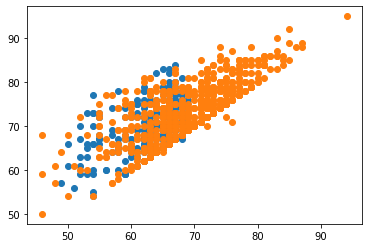

In [16]:
# Data visualisation:

from matplotlib import pyplot as plt

plt.scatter(players_bad['overall_rating'], players_bad['potential'])
plt.scatter(players_normal['overall_rating'], players_normal['potential'])

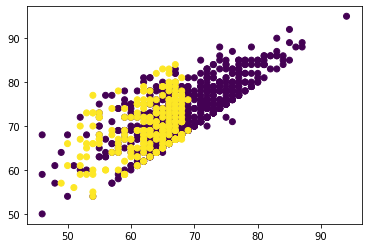

In [17]:
# We add a class so that the two samples are still differentiated when merged into one single dataframe:

players_bad["class"] = 1
players_normal["class"] = 0

players_sample = players_normal.append(players_bad)

# Visualise again:

plt.scatter(players_sample['overall_rating'], players_sample['potential'], c= players_sample["class"])

In [18]:
# We create a variable that encompasses everything but the class variable
# This is needed because the first argument of .fit_resample is all variables EXCEPT the differenciating one (class)
# The second argument is the variable by which we are going to separate values, 
# and where we find the minority/majority divide: class

sample_no_class = players_sample.loc[:, players_sample.columns != "class"]

from imblearn.over_sampling import SMOTE

# We run the SMOTE analysis; before analysis, 700 normal sample entries, 250 bad sample entries; afterwards, 700 each
# smote_X returns potential and actual values of all 1400 entries
# smote_y returns the class of all values (0/1)

smote = SMOTE(sampling_strategy = 'minority')
smote_X, smote_y = smote.fit_resample(sample_no_class, players_sample["class"])

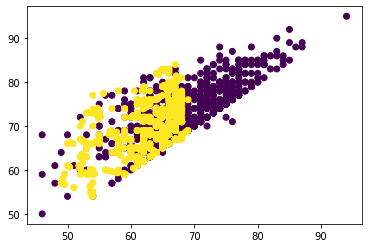

In [19]:
# We have now the same number of samples for both classes

plt.scatter(smote_X["overall_rating"], smote_X["potential"], c = smote_y)

## Level 3

### Exercise 3

Keep using the sports dataset and generate a sample by using the Reservoir sampling method.

In [20]:
# The goal is to choose n number of items from an infinite array of numbers that can only be iterated once
# And yet, all numbers must have the same possibility of being chosen

In [21]:
import random

def generator(max):
    number = 0
    while number < max:
        number += 1
        yield number

# Create as stream generator
stream = generator(183141)

# Doing Reservoir Sampling from the stream
k=1000
reservoir = []

for i, element in enumerate(stream):
    # i stands for the iteration number (starting at 0)
    # element stands for the element of the stream selected as a "candidate" to be appended to the stream
    
    # We first add the first 5 elements, probability of 1/1:
    if i+1<= k:     
        reservoir.append(element)
        
    # After the first 5 elements are added, we check randomly if element has to be added to reservoir:
    else:          
        probability = k/(i+1)
        # As i becomes larger (more iterations pass), the probability of a number being chosen become smaller
        # Since smaller numbers will have to "pass the test" more times than larger ones, all end up having the same
        # probability
        if random.random() < probability:
            # Select item in stream and remove one of the k items already selected
             reservoir[random.choice(range(0,k))] = element
                
# Reservoir as the index number chosen

In [24]:
# We take the 1000 random numbers generated and we use them as indexes of the items selected for the sample

stream_sample = players.loc[reservoir]

stream_sample.tail(10)

,overall_rating,potential
92745,69.0,69.0
36568,63.0,65.0
90472,69.0,74.0
119671,72.0,72.0
44304,64.0,67.0
57716,65.0,84.0
176532,81.0,81.0
70159,67.0,70.0
62240,66.0,66.0
100719,70.0,77.0
